In [2]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

Welcome to JupyROOT 6.26/02


In [3]:
elements = pd.read_csv('Periodic_Table_of_Elements.csv')
elements

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,289.000,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.000,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.000,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.000,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


In [4]:
save_dir = "with_shield"

In [5]:
dir_ = '/Users/shubhampandey/work/geant4/k100sim_anthony/sim_files'
if(save_dir == "no_shield"):
    inFile_k100 = '%s/sim_500k_events_no_shield.root'%(dir_)
elif(save_dir == "with_shield"):
    inFile_k100 = '%s/sim_500k_events_boron_shield_1inch_v1.root'%(dir_)
else:
    print("Incorrect option")

file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree_k100 = file_k100["simtree"]

if(not tree_k100):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

EV = tree_k100["EV"].array(library="np")
EV = EV - 1
Type = tree_k100["Type"].array(library="np")
E1 = tree_k100["E1"].array(library="np")
D3 = tree_k100["D3"].array(library="np")
DT = tree_k100["DT"].array(library="np")
nCap = tree_k100["nCap"].array(library="np")

k100 = pd.DataFrame( {'EV' : EV,
                  'Type' : Type,
                  'E1' : E1,
                  'D3' : D3,
                      'DT' : DT,
                     'nCap' : nCap}
                 )
k100['Edep'] = k100.D3.map(sum)
k100['flag'] = k100.nCap.map(sum).astype(bool)
k100.head(5)


,EV,Type,E1,D3,DT,nCap,Edep,flag
0,323,[-12],[0.5110124],[0.0],[2020],[0],0.000000,False
1,447,"[22, 22, 22, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.49732816, 0.3512036, 0.1496337, 3.9e-05, 1....","[0.0, 0.0, 0.00026759, 3.9e-05, 1.802e-05, 2.7...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.295758,False
2,489,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.22274192, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[0.00049451, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[2008, 2008, 2008, 2008, 2008, 2008, 2008, 200...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.222742,False
3,688,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.065606065, 3.786e-05, 3.964e-05, 3.786e-05,...","[0.00022692, 3.786e-05, 3.964e-05, 3.786e-05, ...","[1002, 1002, 1002, 1002, 1002, 1002, 1002, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.065606,False
4,864,"[-12, -12, -12, -12, -12, -12, -12, -12, -12]","[0.6425657, 0.6425657, 0.6425657, 0.6425657, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000000,False


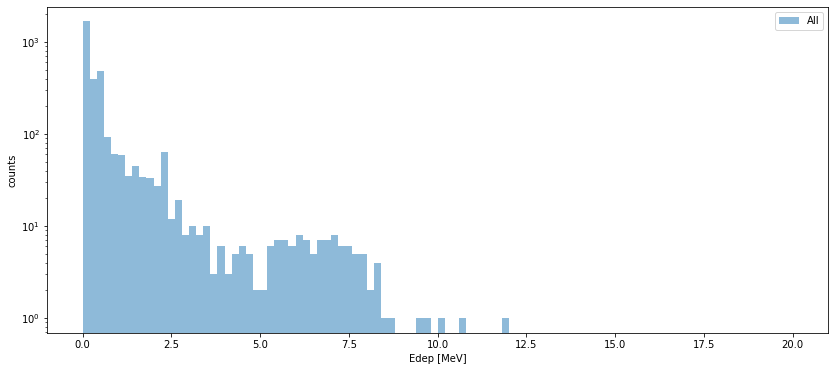

In [6]:
#k100[k100.flag == True]
# plt.hist(k100[k100.flag == True].Edep,bins=100, range=[0,20], alpha=0.5,label='nCap NaI')
# plt.hist(k100[k100.flag == False].Edep,bins=100, range=[0,20], alpha=0.5,label='Non-nCap NaI')
fig = plt.figure(figsize=(14.0,6.0))
plt.hist(k100.Edep,bins=100, range=[0,20], alpha=0.5,label='All')

plt.xlabel('Edep [MeV]')
plt.ylabel('counts')
plt.legend()
plt.yscale('log')
#plt.title("Energy deposited in CE-E+CE-H+AHCAL")

In [7]:
def tile_energy(df_):
    a = (np.dstack((df_.DT,df_.D3)))[0]
    #print (a)
    temp = {}
    for i in a:
        if(i[0] in temp):
            temp[i[0]] += i[1]
        else:
            temp[i[0]] = i[1]
    #print (temp)
    return np.array([temp[i] for i in temp.keys()])

In [8]:
k100['tile_energy'] = k100.apply(tile_energy,axis=1)

In [9]:
#type(k100.tile_energy[0][0])
#np.sum(k100.tile_energy,axis=1)
k100.tile_energy.map(sum)

0       0.000000
1       0.295758
2       0.222742
3       0.065606
4       0.000000
          ...   
3190    1.070370
3191    0.001573
3192    0.219431
3193    0.000000
3194    8.403664
Name: tile_energy, Length: 3195, dtype: float64

In [10]:
k100.head()

,EV,Type,E1,D3,DT,nCap,Edep,flag,tile_energy
0,323,[-12],[0.5110124],[0.0],[2020],[0],0.000000,False,[0.0]
1,447,"[22, 22, 22, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.49732816, 0.3512036, 0.1496337, 3.9e-05, 1....","[0.0, 0.0, 0.00026759, 3.9e-05, 1.802e-05, 2.7...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.295758,False,[0.2957582610506506]
2,489,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.22274192, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[0.00049451, 1.624e-05, 2.94e-05, 2.826e-05, 2...","[2008, 2008, 2008, 2008, 2008, 2008, 2008, 200...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.222742,False,[0.22274192248369218]
3,688,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[0.065606065, 3.786e-05, 3.964e-05, 3.786e-05,...","[0.00022692, 3.786e-05, 3.964e-05, 3.786e-05, ...","[1002, 1002, 1002, 1002, 1002, 1002, 1002, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.065606,False,[0.0656060671844898]
4,864,"[-12, -12, -12, -12, -12, -12, -12, -12, -12]","[0.6425657, 0.6425657, 0.6425657, 0.6425657, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000000,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [11]:
len(k100[(k100.flag == True) & (k100.Edep > 5.)].Edep)

50

Text(0.5, 1.0, 'Sanity check')

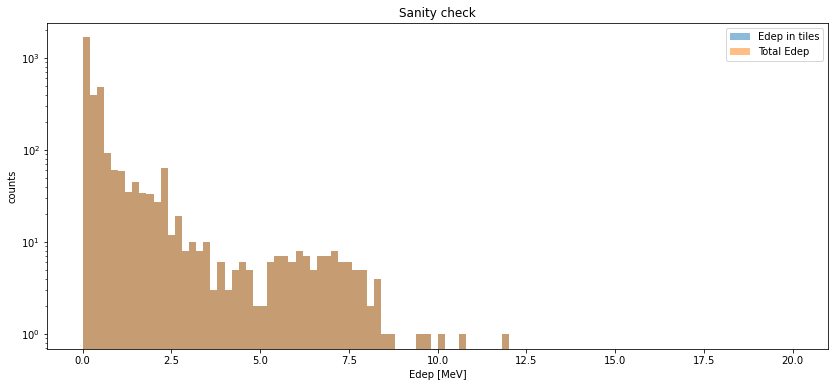

In [12]:
fig = plt.figure(figsize=(14.0,6.0))
plt.hist(k100.tile_energy.map(sum),bins=100, range=[0,20], alpha=0.5,label='Edep in tiles')
plt.hist(k100.Edep,bins=100, range=[0,20], alpha=0.5,label='Total Edep')

plt.xlabel('Edep [MeV]')
plt.ylabel('counts')
plt.legend()
plt.yscale('log')
plt.title("Sanity check")

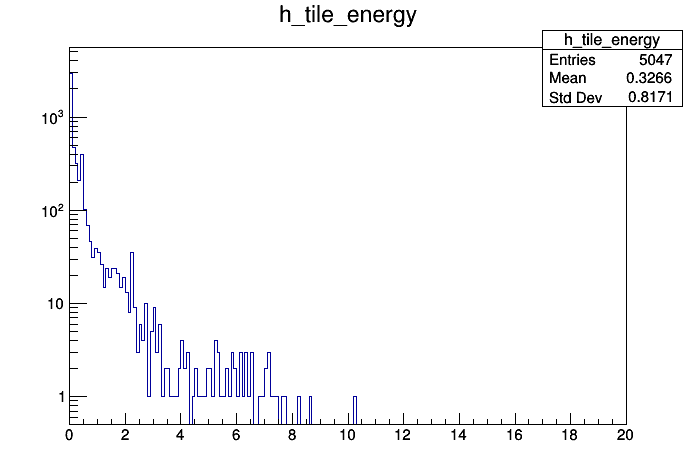

In [13]:
c = rt.TCanvas()
h_tile_energy = rt.TH1F("h_tile_energy","h_tile_energy",200,0,20)

for i in (k100.tile_energy[k100.flag == False]):
    for j in i:
        h_tile_energy.Fill(j)

h_tile_energy.Draw()
rt.gPad.SetLogy()
c.Draw()


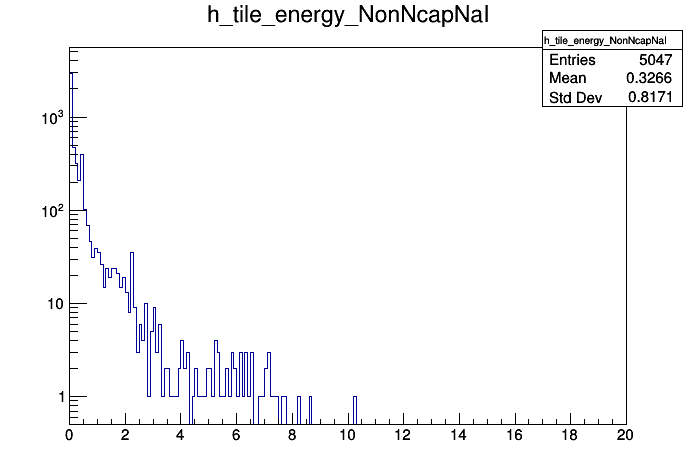

In [14]:
c = rt.TCanvas()
h_tile_energy_NonNcapNaI = rt.TH1F("h_tile_energy_NonNcapNaI","h_tile_energy_NonNcapNaI",200,0,20)

for i in (k100.tile_energy[k100.flag == False]):
    for j in i:
        h_tile_energy_NonNcapNaI.Fill(j)

h_tile_energy_NonNcapNaI.Draw()
rt.gPad.SetLogy()
c.Draw()


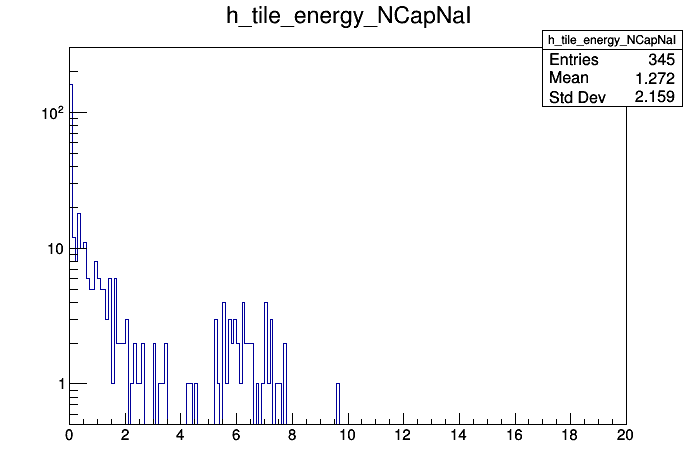

In [15]:
c = rt.TCanvas()
h_tile_energy_NCapNaI = rt.TH1F("h_tile_energy_NCapNaI","h_tile_energy_NCapNaI",200,0,20)

for i in (k100.tile_energy[k100.flag == True]):
    for j in i:
        h_tile_energy_NCapNaI.Fill(j)

h_tile_energy_NCapNaI.Draw()
rt.gPad.SetLogy()
c.Draw()


In [16]:
if(save_dir=="no_shield"):
    inFile_nsc = '%s/Nsc_k100_500k_events_no_shield.root'%(dir_)
elif(save_dir=="with_shield"):
    inFile_nsc = '%s/Nsc_k100_500k_events_boron_shield_1inch_v1.root'%(dir_)
else:
    print("Incorrect directory")

file_nsc = uproot.open(inFile_nsc)
if(not file_nsc):
    print("could not open file: %s"%(inFile_nsc))
    sys.exit(0)
else:
    print("Loaded file: %s"%(inFile_nsc))
tree_nsc = file_nsc["nCapInfo"]

if(not tree_nsc):
    print("nCapInfo does not exist in file: %s"%(file_nsc))
    sys.exit(0)

save_ = False
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05)

Loaded file: /Users/shubhampandey/work/geant4/k100sim_anthony/sim_files/Nsc_k100_500k_events_boron_shield_1inch_v1.root


### livetime : 21.8 seconds for 50 M events

In [17]:
livetime = 0.5 * (21.8/50)
print ("Total livetime = ",livetime,"seconds")

Total livetime =  0.218 seconds


In [18]:
# From k100sim
ev = tree_nsc["fEvent"].array(library="np")
neutron = tree_nsc["fNeutron_energy"].array(library="np")
pdg = tree_nsc["fPDGID"].array(library="np")
sec_KE = tree_nsc["fsec_KE"].array(library="np")

# canvas
c = rt.TCanvas("c","c",800,600)

In [19]:

df = pd.DataFrame( {'fEvent' : ev,
                  'fNeutron_energy' : neutron,
                  'fPDGID' : pdg,
                  'fsec_KE' : sec_KE}
                 )
df.head(10)

,fEvent,fNeutron_energy,fPDGID,fsec_KE
0,0,1.459830e-08,22,7.631125
1,0,1.459830e-08,11,0.007312
2,0,1.459830e-08,260570,0.000543
3,1,5.765503e-08,22,7.631127
4,1,5.765503e-08,11,0.007301
5,1,5.765503e-08,260570,0.000551
6,2,1.478395e-08,22,6.110989
7,2,1.478395e-08,22,0.517069
8,2,1.478395e-08,22,0.786380
9,2,1.478395e-08,22,1.164673


In [20]:
df1 = df[(df.fPDGID != 22) & (df.fPDGID != 11)]
df1

,fEvent,fNeutron_energy,fPDGID,fsec_KE
2,0,1.459830e-08,260570,0.000543
5,1,5.765503e-08,260570,0.000551
10,2,1.478395e-08,170360,0.000702
12,3,1.737362e-09,10020,0.001317
14,6,1.566871e-07,10020,0.001309
...,...,...,...,...
682013,499992,1.319586e-08,10020,0.001315
682015,499995,4.879837e-08,10020,0.001313
682017,499996,1.652188e-08,10020,0.001305
682019,499998,9.722487e-08,10020,0.001312


10020     83.012117
260570     7.506406
140290     1.658699
130280     1.180299
200410     1.083750
822080     1.079741
160330     1.007580
60130      0.823503
170360     0.684192
190400     0.470048
260550     0.434636
110240     0.259579
260580     0.172718
822050     0.085858
822070     0.068820
140300     0.062473
200450     0.058464
140310     0.043096
531280     0.036080
70150      0.033074
240540     0.028731
200440     0.026058
190420     0.025724
160350     0.021381
280590     0.017038
250560     0.017038
200430     0.014031
240530     0.011025
80170      0.011025
260590     0.010691
200490     0.009354
240510     0.008686
822090     0.006347
280610     0.005011
280630     0.004677
160340     0.004343
60140      0.004343
290640     0.004009
170380     0.002673
180410     0.002004
120250     0.002004
120260     0.001336
190410     0.000668
290660     0.000334
200470     0.000334
Name: fPDGID, dtype: float64


Text(5, 80, 'All captures (with_shield)')

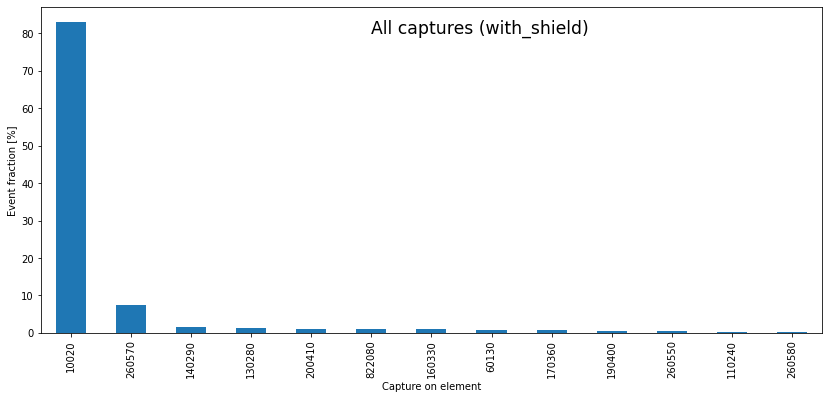

In [22]:
df1 = df[(df.fPDGID != 22) & (df.fPDGID != 11)]
iso_cap_frac_all = (df1['fPDGID'].value_counts(normalize=True))*100
print(iso_cap_frac_all)

ii = (iso_cap_frac_all.index/10000).astype('int')
# newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
# Z = ((iso_cap_frac_all.index/10).astype('int'))%1000
# newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
# iso_cap_frac_all = iso_cap_frac_all.set_axis(newIndex_withZ,axis=0)
#iso_cap_frac_all
fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_all[iso_cap_frac_all > 0.1].plot(kind='bar')
plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(5, 80, 'All captures (%s)'%(save_dir),fontsize='xx-large')

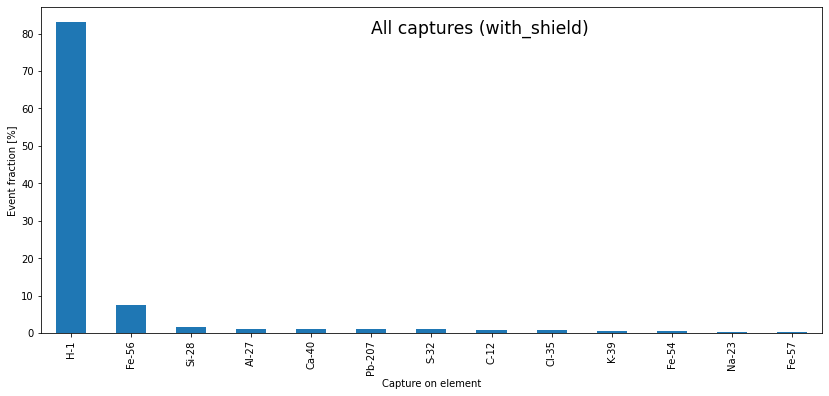

In [17]:
df1 = df[(df.fPDGID != 22) & (df.fPDGID != 11)]
iso_cap_frac_all = (df1['fPDGID'].value_counts(normalize=True))*100


ii = (iso_cap_frac_all.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_all.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_all = iso_cap_frac_all.set_axis(newIndex_withZ,axis=0)
#iso_cap_frac_all
fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_all[iso_cap_frac_all > 0.1].plot(kind='bar')
plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(5, 80, 'All captures (%s)'%(save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/All_captures.png"%(save_dir))
    print("Figure saved: %s/All_captures.png"%(save_dir))

plt.show()

10020     45.550428
170360    13.777192
130280     8.503626
260570     7.317073
531280     7.119314
140290     3.559657
240540     2.504944
200410     1.582070
160330     1.384311
110240     1.186552
822080     1.186552
250560     1.054713
280590     0.856955
260550     0.725115
60130      0.659196
190400     0.461437
240510     0.395517
240530     0.329598
822050     0.263678
140300     0.263678
170380     0.197759
200450     0.131839
822070     0.131839
280630     0.131839
70150      0.131839
290640     0.131839
140310     0.065920
200440     0.065920
280610     0.065920
160350     0.065920
190420     0.065920
160340     0.065920
260580     0.065920
Name: fPDGID, dtype: float64


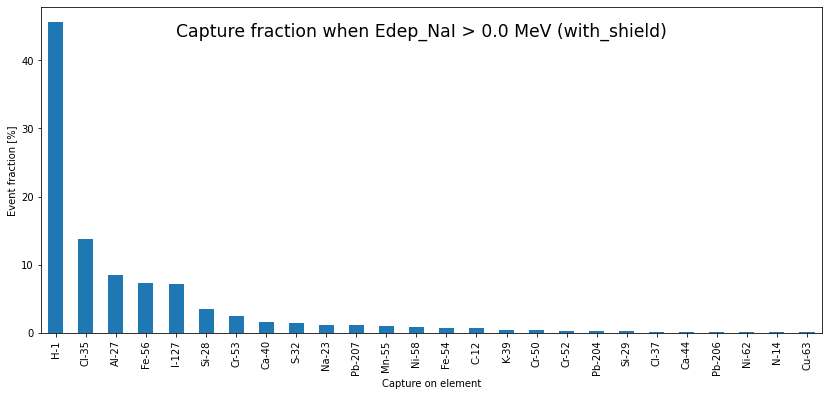

In [18]:
Edep_NaI = 0.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')

newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)

y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(4, y_pos, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

10020     32.272727
531280    18.181818
170360    12.954545
130280     9.545455
260570     7.272727
240540     3.863636
140290     2.727273
160330     2.272727
110240     2.045455
822080     1.818182
200410     1.363636
280590     1.363636
250560     1.363636
260550     0.909091
190400     0.227273
140310     0.227273
160350     0.227273
70150      0.227273
60130      0.227273
240530     0.227273
290640     0.227273
260580     0.227273
240510     0.227273
Name: fPDGID, dtype: float64


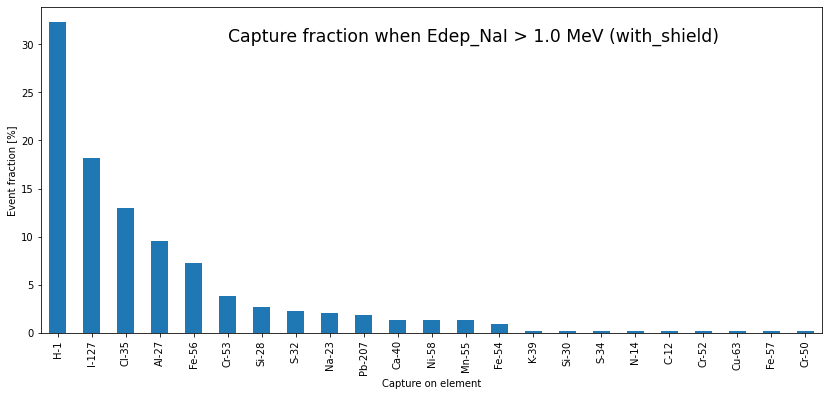

In [23]:
Edep_NaI = 1.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)
y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(5, y_pos, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

10020     23.529412
531280    22.352941
170360    14.509804
260570    10.196078
130280     7.843137
240540     3.529412
160330     3.137255
822080     2.745098
110240     2.745098
140290     2.745098
200410     1.568627
260550     1.176471
250560     0.784314
280590     0.392157
260580     0.392157
290640     0.392157
190400     0.392157
60130      0.392157
160350     0.392157
140310     0.392157
240510     0.392157
Name: fPDGID, dtype: float64


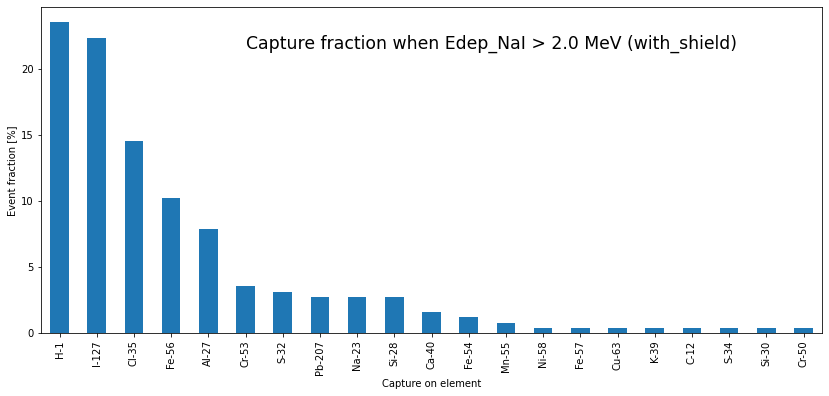

In [20]:
Edep_NaI = 2.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)

y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(5, y_pos, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

143
531280    35.664336
170360    18.881119
260570    14.685315
130280     9.090909
822080     4.195804
110240     4.195804
160330     4.195804
140290     2.097902
200410     1.398601
190400     0.699301
240540     0.699301
10020      0.699301
250560     0.699301
60130      0.699301
280590     0.699301
260580     0.699301
240510     0.699301
Name: fPDGID, dtype: float64


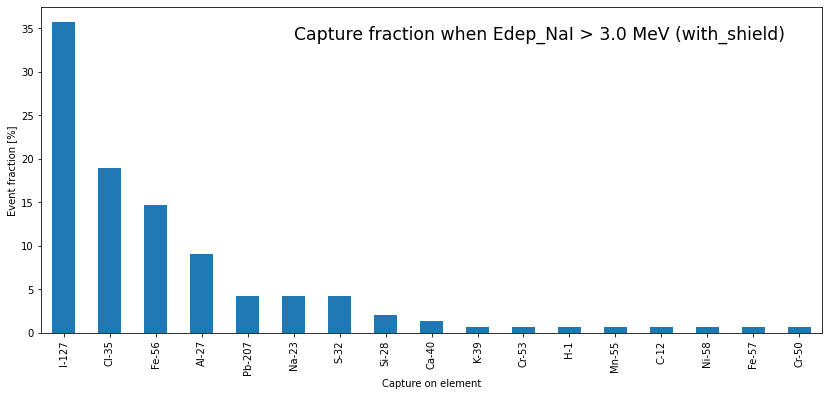

In [30]:
Edep_NaI = 3.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print ((df2['fPDGID'].value_counts()).sum())
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)

y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(5, y_pos, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

531280    48
170360    22
260570    16
130280     8
110240     5
160330     4
822080     4
140290     3
240540     1
190400     1
10020      1
200410     1
260580     1
240510     1
Name: fPDGID, dtype: int64
531280    41.379310
170360    18.965517
260570    13.793103
130280     6.896552
110240     4.310345
160330     3.448276
822080     3.448276
140290     2.586207
240540     0.862069
190400     0.862069
10020      0.862069
200410     0.862069
260580     0.862069
240510     0.862069
Name: fPDGID, dtype: float64


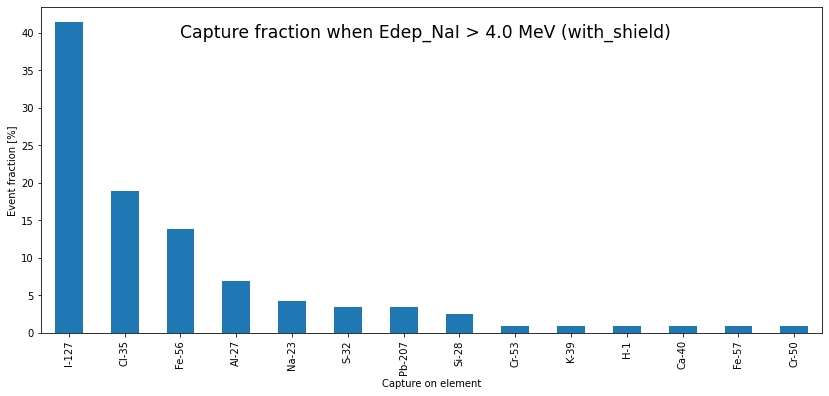

In [26]:
Edep_NaI = 4.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (df2['fPDGID'].value_counts())
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)

y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(2, y_pos, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

In [23]:
save_dir

'with_shield'

531280    47.474747
170360    17.171717
260570    13.131313
130280     8.080808
822080     4.040404
160330     3.030303
110240     3.030303
240540     1.010101
140290     1.010101
260580     1.010101
240510     1.010101
Name: fPDGID, dtype: float64


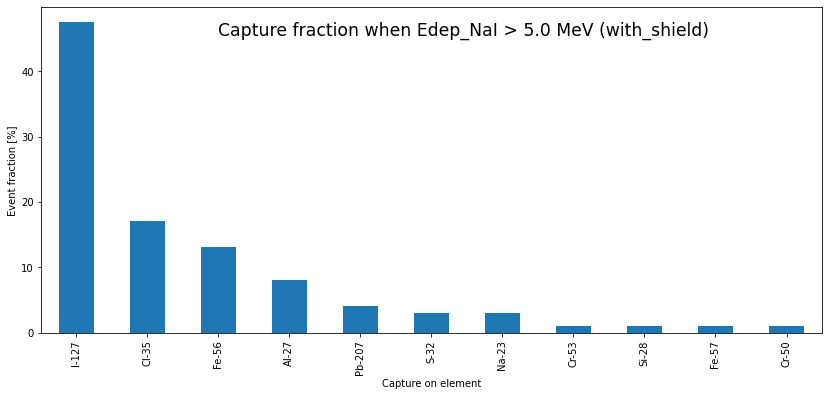

In [24]:
Edep_NaI = 5.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)


y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(2, y_pos, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

531280    54.166667
260570    18.055556
170360     8.333333
130280     4.166667
110240     4.166667
822080     4.166667
240540     1.388889
160330     1.388889
140290     1.388889
260580     1.388889
240510     1.388889
Name: fPDGID, dtype: float64


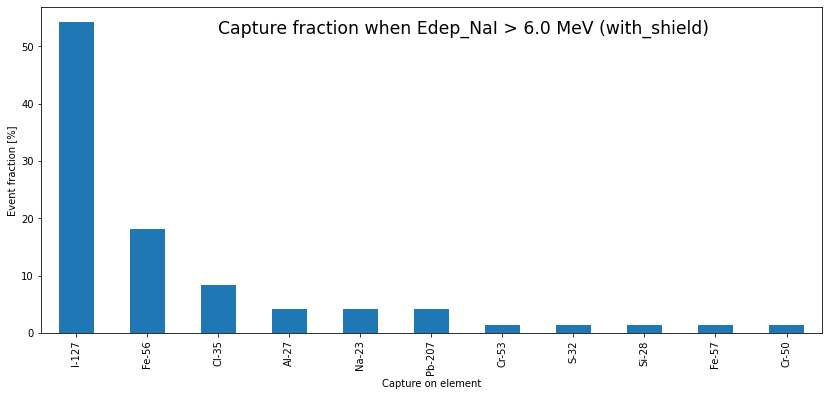

In [25]:
Edep_NaI = 6.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)


y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(2, y_pos, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

531280    60.975610
260570    14.634146
170360     7.317073
110240     7.317073
160330     2.439024
140290     2.439024
260580     2.439024
240510     2.439024
Name: fPDGID, dtype: float64


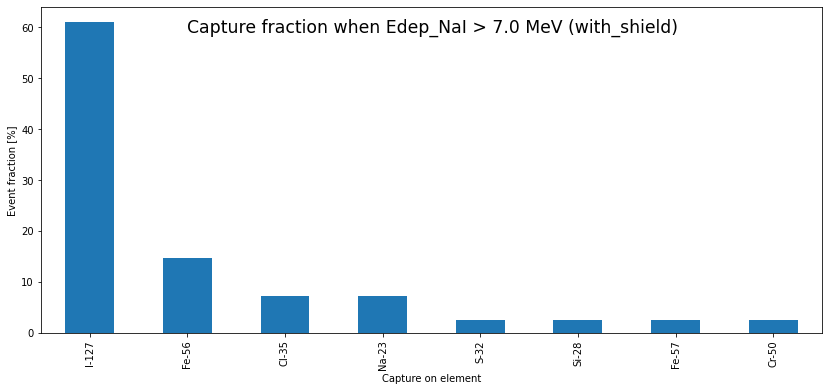

In [26]:
Edep_NaI = 7.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)


y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(1, y_pos, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

531280    63.636364
110240     9.090909
140290     9.090909
260580     9.090909
240510     9.090909
Name: fPDGID, dtype: float64


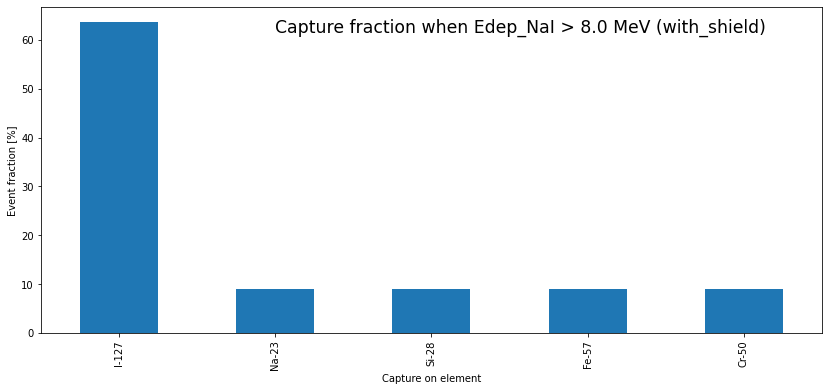

In [27]:
Edep_NaI = 8.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)


y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(1, y_pos, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

531280    33.333333
110240    33.333333
260580    33.333333
Name: fPDGID, dtype: float64


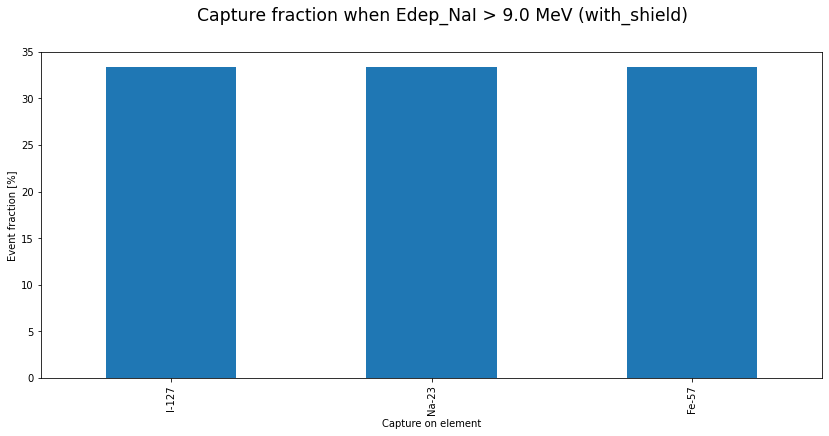

In [28]:
Edep_NaI = 9.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)


y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(0.1, y_pos+7, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

110240    50.0
260580    50.0
Name: fPDGID, dtype: float64


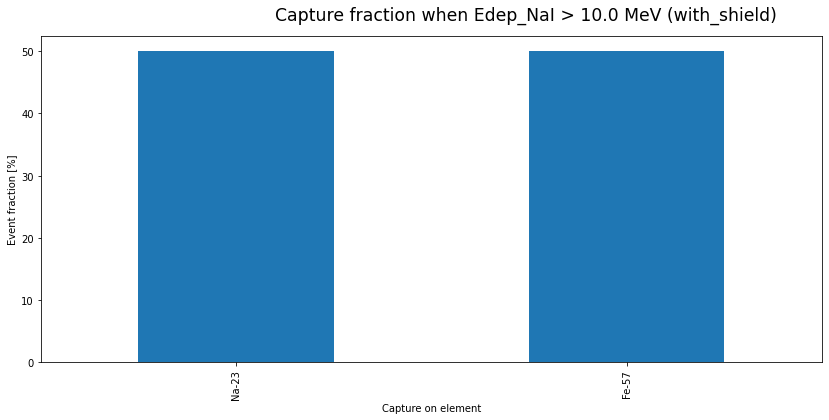

In [29]:
Edep_NaI = 10.0
df2 = df[(df.fPDGID != 22) & (df.fPDGID != 11) & (df['fEvent'].isin(k100.EV[k100.Edep > Edep_NaI]))]
iso_cap_frac_EdepNaI = (df2['fPDGID'].value_counts(normalize=True))*100
print (iso_cap_frac_EdepNaI)
ii = (iso_cap_frac_EdepNaI.index/10000).astype('int')
newIndex = [elements[elements.AtomicNumber == i].Symbol.iloc[0] for i in ii]
Z = ((iso_cap_frac_EdepNaI.index/10).astype('int'))%1000
newIndex_withZ = [i+"-"+str(Z[j]-1)for j,i in enumerate(newIndex)]
iso_cap_frac_EdepNaI = iso_cap_frac_EdepNaI.set_axis(newIndex_withZ,axis=0)


y_pos = iso_cap_frac_EdepNaI.iloc[0] - 2

fig = plt.figure(figsize=(14.0,6.0))
iso_cap_frac_EdepNaI[iso_cap_frac_EdepNaI > 0.1].plot(kind='bar')

plt.xlabel('Capture on element')
plt.ylabel('Event fraction [%]')
plt.text(0.1, y_pos+7, 'Capture fraction when Edep_NaI > %0.1f MeV (%s)'%(Edep_NaI,save_dir),fontsize='xx-large')

if(save_):
    plt.savefig("%s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))
    print ("Figure saved: %s/Captures_Edep_%d.png"%(save_dir,Edep_NaI))

plt.show()

In [30]:
len(k100[(k100.Edep > 5.)].Edep)

105

Text(0.5, 1.0, 'KE of each photon after nCap')

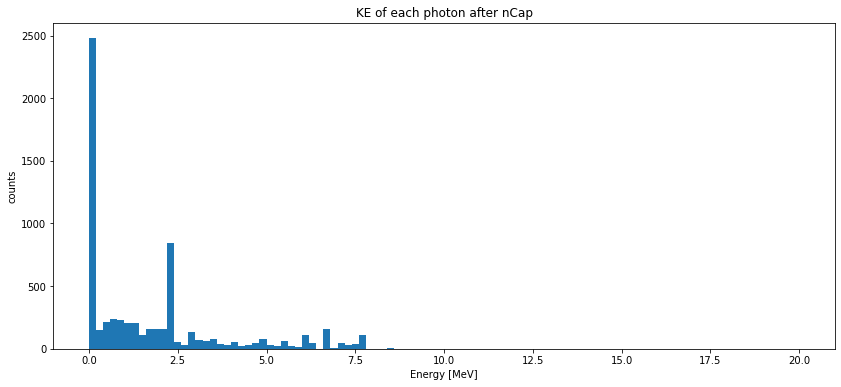

In [31]:
df3 = df[(df['fEvent'].isin(k100.EV))]
photon = df3[df3.fPDGID == 22]
photon_KE = df3.fsec_KE
photon_KE_sum = photon.groupby(['fEvent']).sum().fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_KE,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap")

Text(0.5, 1.0, 'KE of each photon after nCap - logY scale')

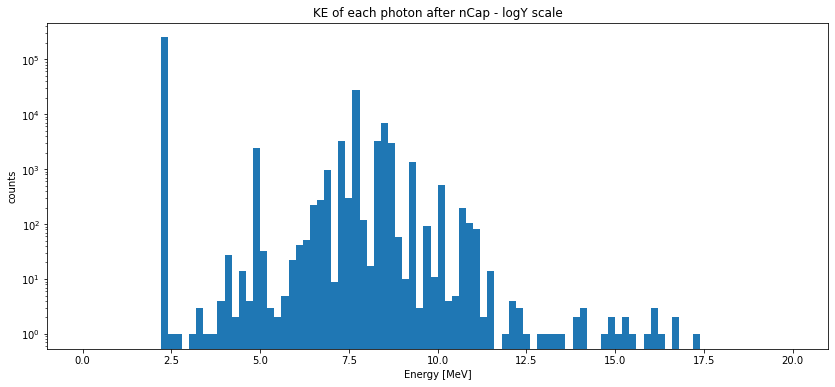

In [32]:
photon = df[df.fPDGID == 22]
photon_KE_sum = photon.groupby(['fEvent']).sum().fsec_KE
photon_count = photon.groupby(['fEvent']).count().fPDGID

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_KE_sum,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
plt.yscale('log')

plt.title("KE of each photon after nCap - logY scale")

299291


Text(0.5, 1.0, 'KE of each photon after nCap')

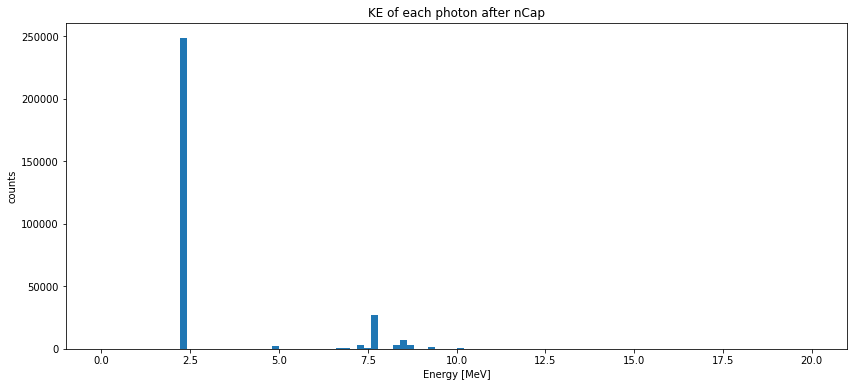

In [33]:
photon = df[df.fPDGID == 22]
photon_KE_sum = photon.groupby(['fEvent']).sum().fsec_KE
photon_count = photon.groupby(['fEvent']).count().fPDGID

print (len(photon_count))
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_KE_sum,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap")

In [34]:
count_photon = 0
Fe_photon = []
photon_energy = []
Fe_event = []
Cl_event = []
H_event = []
Si_event = []
Al_event = []
Ca_event = []
Pb_event = []
S_event = []
C_event = []
I_event = []
for i in tqdm(range(len(ev))):
    if(pdg[i] == 260570):
        Fe_event.append(ev[i])
    if(pdg[i] == 10020):
        H_event.append(ev[i])
    if(pdg[i] == 140290):
        Si_event.append(ev[i])
    if(pdg[i] == 130280):
        Al_event.append(ev[i])
    if(pdg[i] == 200410):
        Ca_event.append(ev[i])
    if(pdg[i] == 822080):
        Pb_event.append(ev[i])
    if(pdg[i] == 160330):
        S_event.append(ev[i])
    if(pdg[i] == 60130):
        C_event.append(ev[i])
    if(pdg[i] == 531280):
        I_event.append(ev[i])
    if(pdg[i] == 170360):
        Cl_event.append(ev[i])
    if(pdg[i] > 10000):        
        if(pdg[i] == 260570):
            Fe_photon.append(count_photon)
        photon_energy.clear()
        count_photon = 0
    if(pdg[i] == 22):
        count_photon += 1
        photon_energy.append(sec_KE[i])
#print(Fe_photon)

100%|██████████████████████████████████████████████████████████████████████████████████████| 682023/682023 [00:06<00:00, 105900.53it/s]


In [30]:
I_event[:30]

[1266,
 7694,
 11204,
 15636,
 21751,
 23901,
 26388,
 28675,
 31521,
 31954,
 33260,
 36010,
 37139,
 42044,
 47620,
 50056,
 53145,
 54330,
 64038,
 64185,
 78993,
 91159,
 96333,
 100326,
 103418,
 110810,
 112444,
 118996,
 144365,
 148613]

In [ ]:
len(Si_event)

# Capture on Fe

In [35]:
isotope_26057 = df[df['fEvent'].isin(Fe_event)]

In [45]:
save_ = True

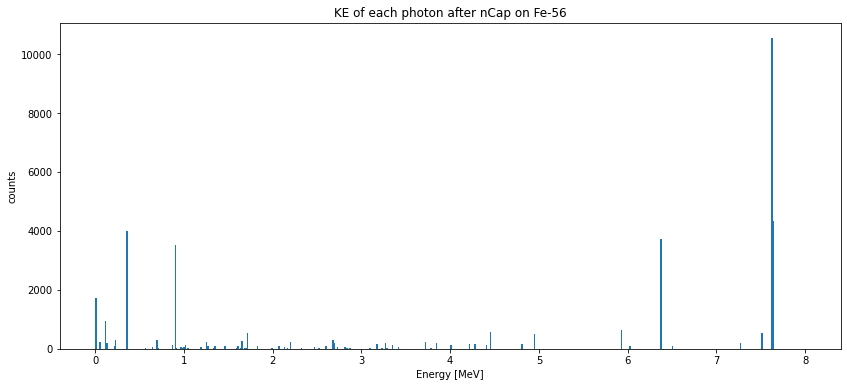

In [47]:
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_26057[isotope_26057.fPDGID == 22].fsec_KE,bins=500, range=[0,8])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap on Fe-56")
if(save_):
    plt.savefig("Espectra/Egamma_Fe56.png")
    

plt.show()

In [ ]:
photon = isotope_26057[isotope_26057.fPDGID == 22]
photon_count = photon.groupby(['fEvent']).count().fPDGID

photon_count

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_count,bins=10, range=[0,10])

plt.xlabel('Number of photons')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("Number of photons emitted after being nCap Fe")

In [ ]:
isotope_26057.loc[isotope_26057.fEvent == 3]
print(photon_count[photon_count == 8].index)
isotope_26057.loc[isotope_26057.fEvent == 168974]

In [ ]:
#photon.fsec_KE
photon = isotope_26057[isotope_26057.fPDGID == 22]
photon_KE_sum = photon.groupby(['fEvent']).sum().fsec_KE

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_KE_sum,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
plt.yscale('log')

plt.title("Energy sum of photons after nCap Fe")

# Capture on H

In [ ]:
isotope_10020 = df[df['fEvent'].isin(H_event)]

In [ ]:
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_10020[isotope_10020.fPDGID == 22].fsec_KE,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap H")

In [ ]:
photon = isotope_10020[isotope_10020.fPDGID == 22]
photon_count = photon.groupby(['fEvent']).count().fPDGID

photon_count

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_count,bins=10, range=[0,10])

plt.xlabel('Number of photons')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("Number of photons emitted after being nCap H")

In [ ]:
#photon.fsec_KE
photon = isotope_10020[isotope_10020.fPDGID == 22]
photon_KE_sum = photon.groupby(['fEvent']).sum().fsec_KE

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_KE_sum,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
plt.yscale('log')

plt.title("Energy sum of photons after nCap H")

# Capture on Al

In [ ]:
isotope_130280 = df[df['fEvent'].isin(Al_event)]

In [ ]:
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_130280[isotope_130280.fPDGID == 22].fsec_KE,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap Al")

In [ ]:
photon = isotope_130280[isotope_130280.fPDGID == 22]
photon_count = photon.groupby(['fEvent']).count().fPDGID

photon_count

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_count,bins=10, range=[0,10])

plt.xlabel('Number of photons')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("Number of photons emitted after being nCap Al")

In [ ]:
#photon.fsec_KE
photon = isotope_130280[isotope_130280.fPDGID == 22]
photon_KE_sum = photon.groupby(['fEvent']).sum().fsec_KE

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_KE_sum,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
plt.yscale('log')

plt.title("KE of each photon after nCap Al")

# Capture on Si

In [155]:
isotope_140290 = df[df['fEvent'].isin(Si_event)]

Text(0.5, 1.0, 'KE of each photon after nCap Si')

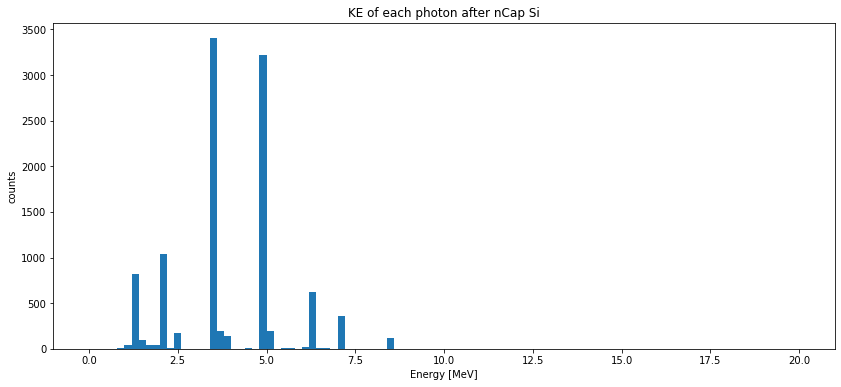

In [156]:
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_140290[isotope_140290.fPDGID == 22].fsec_KE,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap Si")

In [ ]:
photon = isotope_140290[isotope_140290.fPDGID == 22]
photon_count = photon.groupby(['fEvent']).count().fPDGID

photon_count

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_count,bins=10, range=[0,10])

plt.xlabel('Number of photons')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("Number of photons emitted after being nCap Si")

In [ ]:
#photon.fsec_KE
photon = isotope_140290[isotope_140290.fPDGID == 22]
photon_KE_sum = photon.groupby(['fEvent']).sum().fsec_KE

fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_KE_sum,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
plt.yscale('log')

plt.title("KE of each photon after nCap Si")

# Capture on Ca

In [ ]:
isotope_200410 = df[df['fEvent'].isin(Ca_event)]
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_200410[isotope_200410.fPDGID == 22].fsec_KE,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap Ca")

# Capture on Pb

In [ ]:
isotope_822080 = df[df['fEvent'].isin(Pb_event)]
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_822080[isotope_822080.fPDGID == 22].fsec_KE,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap Pb")

# Capture on S

In [ ]:
isotope_160330 = df[df['fEvent'].isin(S_event)]
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_160330[isotope_160330.fPDGID == 22].fsec_KE,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap S")

# Capture on C

In [ ]:
isotope_60130 = df[df['fEvent'].isin(C_event)]
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_60130[isotope_60130.fPDGID == 22].fsec_KE,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap C")

# Capture on Cl

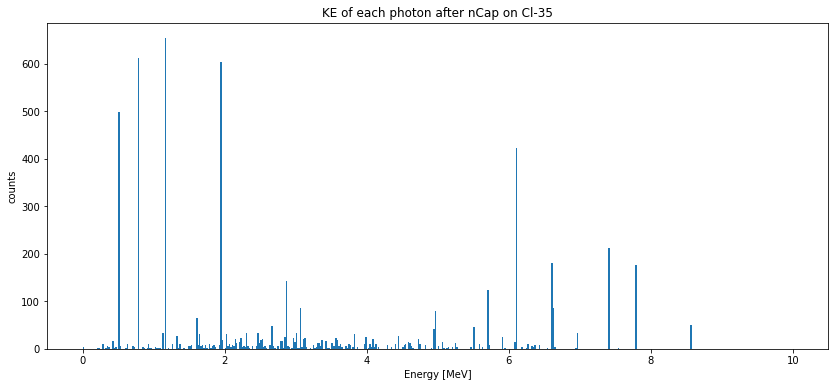

In [63]:
isotope_170360 = df[df['fEvent'].isin(Cl_event)]
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_170360[isotope_170360.fPDGID == 22].fsec_KE,bins=500, range=[0,10])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap on Cl-35")

if(save_):
    plt.savefig("Espectra/Egamma_Cl35.png")
    

plt.show()

# Capture on I

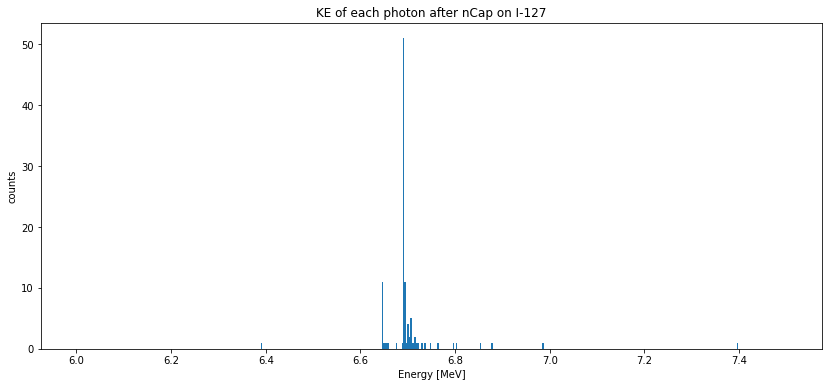

In [77]:
isotope_531280 = df[df['fEvent'].isin(I_event)]
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotope_531280[isotope_531280.fPDGID == 22].fsec_KE,bins=500, range=[6.0,7.5])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap on I-127")

if(save_):
    plt.savefig("Espectra/Egamma_I127.png")
    

plt.show()

In [ ]:
temp_df = df
temp_df.set_index(['fEvent'])
select_Fe = temp_df.fEvent.iloc[EvntID_Fe] 
temp_df.iloc[select_Fe.index]


In [ ]:
photon = df[df.fPDGID == 22]
photon_KE_sum = photon.groupby(['fEvent']).sum().fsec_KE
photon_count = photon.groupby(['fEvent']).count().fPDGID
photon_count

In [ ]:
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_count,bins=10, range=[0,10])

plt.xlabel('Number of photons')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
plt.yscale('log')

plt.title("Number of photons emitted after being nCap")

In [ ]:
#photon.fsec_KE
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon.fsec_KE,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
#plt.yscale('log')

plt.title("KE of each photon after nCap")

In [ ]:
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(photon_KE_sum,bins=100, range=[0,20])

plt.xlabel('Energy [MeV]')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
plt.yscale('log')

plt.title("sum of Photon KE")

In [ ]:
check = df.groupby(['fEvent'])
isotopes = (check.last()['fPDGID']/10000).astype('int32')
isotopes.iloc[:]


In [ ]:
check.count()

In [ ]:
fig = plt.figure(figsize=(14.0,6.0))


plt.hist(isotopes.iloc[:],bins=120, range=[0,120])

plt.xlabel('Atomic Number')
plt.ylabel('counts')
#plt.yscale('log', nonposy='clip')
plt.yscale('log')

plt.title("nCap Isotopes")

In [ ]:
secondaries = df.groupby('fEvent')
secondaries.head(10)

In [ ]:
gammas = df.groupby(['fEvent','fPDGID'])['fsec_KE']
KE_sum = (gammas.sum()).to_frame()
KE_sum.fsec_KE.iloc[4]

In [ ]:
#gammas.__dict__
#gammas.obj.iloc[4]
df.iloc[4]